In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

<ipython-input-64-ef889392170e>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.0.1+cu118


In [ ]:
torch.manual_seed(42) # Setting the seed

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[-3.0900e+23,  4.5437e-41,  7.2068e+06,  3.0729e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  1.8337e+31,  1.8788e+31,  1.7220e+22]],

        [[ 2.1715e-18,  5.2592e+22,  8.1346e+20,  1.0384e-08],
         [ 2.1160e-07,  1.7187e-04,  1.7156e-07,  5.3366e-08],
         [ 1.7395e-04,  6.7566e-07,  2.1707e-18,  1.6678e+19]]])


In [ ]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.rand((2,3,4))

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [ ]:
torch.randn((2,3))

tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])

In [ ]:
torch.arange(1,6,2)

tensor([1, 3, 5])

In [ ]:
torch.Tensor([[1, 2], [3, 4]])

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
x.shape

torch.Size([2, 3, 4])

In [ ]:
x.size()

torch.Size([2, 3, 4])

In [ ]:
'''
Transfer between numpy and tensor.
Many statistical calculation package only based on numpy, so need to trans.
'''

'\nTransfer between numpy and tensor.\nMany statistical calculation package only based on numpy, so need to trans.\n'

In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


In [ ]:
# Operations

x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
Y tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2) #In-place operation, do not use new memory.

X1 (before) tensor([[0.7539, 0.1952, 0.0050],
        [0.3068, 0.1165, 0.9103]])
X2 (before) tensor([[0.6440, 0.7071, 0.6581],
        [0.4913, 0.8913, 0.1447]])
X1 (after) tensor([[0.7539, 0.1952, 0.0050],
        [0.3068, 0.1165, 0.9103]])
X2 (after) tensor([[1.3979, 0.9024, 0.6632],
        [0.7981, 1.0078, 1.0550]])


In [ ]:
x = torch.arange(6)
print("X", x)

x.view((2,3))

X tensor([0, 1, 2, 3, 4, 5])


tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
x.reshape((2,3))

tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
x = x.view(2, 3)
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)


X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [ ]:
# Dynamic Computation Graph and Backpropagation

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [ ]:
y.backward()

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


In [ ]:
'''
Check GPU
'''

gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

Device cpu
X tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s") #0.20694s

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds. #GPU time: 0.00985s
# Not have GPU here.

CPU time: 2.72262s


RuntimeError: ignored

In [ ]:
'''
Build model
Learning by example: Continuous XOR：
  If we want to build a nn, we need specify our parameters (weight matrix and bias vectors) using Tensors (requires_grid = True),
  Then calculate gradients, and then adjust parameters.
  Pytorch: torch.nn  help building nn more convinient.
  An example: XOR classification
    Label 1: one of x1 and x2 is 1, the other one is 0.
    Label 0: all other cases.
    Put XOR into continuous space + introduce some gaussian noise.
'''

'\nBuild model\nLearning by example: Continuous XOR：\n  If we want to build a nn, we need specify our parameters (weight matrix and bias vectors) using Tensors (requires_grid = True),\n  Then calculate gradients, and then adjust parameters.\n  Pytorch: torch.nn  help building nn more convinient.\n  An example: XOR classification\n    Label 1: one of x1 and x2 is 1, the other one is 0.\n    Label 0: all other cases.\n    Put XOR into continuous space + introduce some gaussian noise.\n'

In [ ]:
### The model
# torch.nn: define some useful classes, ex: layers, activation functions, loss functions.
# torch.nn.functional: functions used in network layers.
import torch.nn as nn
import torch.nn.functional as F

'''
Neural network is a module.
Also, in pytorch, a neural network is built up out of modules.
Modules can contain other modules (NN is a module based on other modules).
The basic template of a module:
'''
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module
        # In the init function, we usually create the parameters of the module, using nn.Parameter, or defining other modules that are used in the forward function.

    def forward(self, x):
        # Function for performing the calculation of the module.
        # The forward function is where the computation of the module is taken place, and is executed when you call the module (nn = MyModule(); nn(x)).
        pass

        # The backward calculation is done automatically, but could be overwritten as well if wanted.
        # So __init__: used to define other modules will be used.
        # forword: define what calculation will be applied used defined modules.

In [ ]:
'''
hyperparameters: num_inputs, num_hidden, num_outputs
Alreay defined when create classifier module.
ex: x = (x1, x2) as input
'''

class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x) # return linear transformed x
        x = self.act_fn(x) # return activayed x
        x = self.linear2(x) # return output
        return x

In [ ]:
'''
For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons.
As we perform binary classification, we will use a single output neuron.
Note that we do not apply a sigmoid on the output yet.
This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output.
We will discuss the detailed reason later.
'''

model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)

# Printing a module shows all its submodules
print(model)

'''
The parameters of a module can be obtained by using its parameters() functions, or named_parameters() to get a name to each parameter object.
For our small neural network, we have the following parameters:
'''

for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [ ]:
for i in model.parameters():
  print("I:", i)

I: Parameter containing:
tensor([[ 0.6636, -0.5352],
        [ 0.4347, -0.0900],
        [ 0.4238, -0.5006],
        [-0.2457,  0.1416]], requires_grad=True)
I: Parameter containing:
tensor([ 0.3265, -0.2607, -0.5156, -0.2014], requires_grad=True)
I: Parameter containing:
tensor([[-0.2344,  0.3007, -0.0931, -0.1128]], requires_grad=True)
I: Parameter containing:
tensor([0.3589], requires_grad=True)


In [ ]:
model.named_parameters()

<generator object Module.named_parameters at 0x7b3c989ed850>

In [ ]:
'''
Data and DataLoader
'''

import torch.utils.data as data
# data.Dataset: provides an uniform interface to access the training/test data.
# data.DataLoader: makes sure to efficiently load and stack the data points from the dataset into batches during training. (construct batch)

'''
The dataset class summarizes the basic functionality of a dataset in a natural way.
To define a dataset in PyTorch, we simply specify two functions: __getitem__, and __len__.
The get-item function has to return the -th data point in the dataset.
While the len function returns the size of the dataset.
For the XOR dataset, we can define the dataset class as follows:
'''

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
# Then, creat a dataset and check it.
dataset = XORDataset(size = 200)
print("Size of dataset:", len(dataset))
print("Size of dataset:", dataset.__len__)
print("Data point 0:", dataset[0])

Size of dataset: 200
Size of dataset: <bound method XORDataset.__len__ of <__main__.XORDataset object at 0x7b3c984ca800>>
Data point 0: (tensor([0.7608, 0.9452]), tensor(0))


In [ ]:
#print("data of dataset:", dataset.data)
print("label of dataset:", dataset.label)
print("Size of dataset:", dataset.size)

label of dataset: tensor([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0])
Size of dataset: 200


In [ ]:
isinstance(dataset.data, torch.Tensor)

True

In [ ]:
dataset.data.cpu().numpy()

array([[ 0.7608012 ,  0.9452223 ],
       [ 0.02869256,  0.89683086],
       [ 0.02248912,  1.1008589 ],
       [ 0.1086429 , -0.13457054],
       [ 0.127395  ,  1.0495324 ],
       [ 1.2197926 ,  1.0804863 ],
       [ 1.1576204 ,  0.9896125 ],
       [-0.04251523,  1.0546719 ],
       [ 1.1179819 , -0.21576846],
       [ 1.0435078 ,  0.06978183],
       [ 0.93429595,  0.98375946],
       [-0.07023665,  0.8030439 ],
       [-0.04135388,  1.0214964 ],
       [ 0.10117321, -0.06002751],
       [-0.01796788,  0.23591624],
       [ 0.02498   ,  0.9100423 ],
       [-0.07944458, -0.27783883],
       [ 0.01853468,  0.21287203],
       [-0.14863531,  0.9902015 ],
       [ 0.96047264, -0.01017277],
       [-0.06538058,  1.0058619 ],
       [ 1.0832111 ,  1.0430056 ],
       [ 1.0417181 , -0.03854479],
       [ 0.9949322 ,  0.04989896],
       [ 1.0137131 ,  0.8794639 ],
       [ 1.253497  , -0.12002319],
       [ 1.0769854 ,  0.9866148 ],
       [ 1.0282966 ,  1.0316359 ],
       [-0.02576164,

In [ ]:
dataset.label.cpu().numpy() == 0

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,

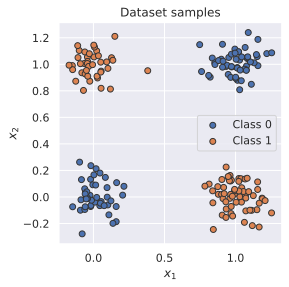

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
# data loader
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

In [ ]:
# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0241,  0.0122],
        [ 1.1574,  1.1875],
        [ 1.0303,  0.0019],
        [ 0.1365,  1.0304],
        [ 1.0770,  0.9866],
        [ 0.9080,  1.1508],
        [ 0.8787,  0.0201],
        [-0.1464, -0.0739]])
Data labels torch.Size([8]) 
 tensor([0, 0, 1, 1, 0, 0, 1, 0])


In [ ]:
'''
Optimization
After defining model and the dataset, prepare optimization model.
During training, we perform following steps:
1. Get a batch from dataset loader.
2. Obtain the predictions from the model for the batch.
3. Calculate the loss based on the difference between prediction and labels.
4. Backpropergation: calculate the gradients for every parameter with respect to the loss.
5. Update parameters of the model in the direction of the gradients.
'''

# Loss model
# For this binary classification, can use Binary Cross Entropy (BCE):
# In pytorch:  nn.BCELoss(), nn.BCEWithLogitsLoss()
# nn.BCELoss expects the inputs x to be in the range [0,1], i.e. the output of a sigmoid.
# nn.BCEWithLogitsLoss: combines a sigmoid layer and the BCE loss in a single class.
#     This version is numerically more stable than using a plain Sigmoid followed by a BCE loss
#     because of the logarithms applied in the loss function. (So no Sigmoid again to output!!!)
# Thus, we use BCE log loss here.
loss_module = nn.BCEWithLogitsLoss()

'''
Stochastic gradient descent
For updating the parameters, PyTorch provides the package:
   torch.optim, that has most popular optimizers implemented.
Just apply simplest optim first: torch.optim.SGD() ---- Stochastic Gradient Descent
update parameter by: parameter - gradients * learning rate
'''
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer has two functions:
#   optimizer.step(): update parameters
#   optimizer.zero_grad(): sets the gradients of all parameters to zero.
#         A crucial pre-step before performing backpropagation.
#         If we call the backward function on the loss while the parameter gradients are non-zero from the previous batch,
#                    the new gradients would actually be added to the previous ones instead of overwriting them.
#         Remember to call optimizer.zero_grad() before calculating the gradients of a batch.

In [ ]:
loss_module

BCEWithLogitsLoss()

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

Device cpu
X tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
device # I don't use gpu here

device(type='cpu')

In [ ]:
x1 = torch.rand((1,3,4,))
print(x1.size())
x1 = x1.squeeze(dim=2) # only apply squeeze on choosed dim, ex: dim=2, will jump dim 0 that = 1, only deal with dim 2.
print(x1.size())
x1 = x1.squeeze() # only need to input dim=xxx
print(x1.shape)

torch.Size([1, 3, 4])
torch.Size([1, 3, 4])
torch.Size([3, 4])


In [ ]:
x2 = torch.rand((1,3,4))
x2

tensor([[[0.8567, 0.6675, 0.8368, 0.0241],
         [0.2808, 0.5515, 0.3931, 0.1378],
         [0.4753, 0.4273, 0.1733, 0.8669]]])

In [ ]:
x1

tensor([[0.8463, 0.5109, 0.0338, 0.5039],
        [0.6665, 0.8478, 0.0290, 0.8987],
        [0.9165, 0.7328, 0.1475, 0.0937]])

In [ ]:
x3 = torch.rand((3,1))
print(x3)
x3 = x3.squeeze() # only apply squeeze on choosed dim, ex: dim=2, will jump dim 0 that = 1, only deal with dim 2.
print(x3)

tensor([[0.3432],
        [0.5499],
        [0.8694]])
tensor([0.3432, 0.5499, 0.8694])


In [ ]:
model.train()

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
'''
Train model
1. Create larger dataset with larger batch:
'''
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

'''
1.5: Push model to GPU if have
'''
# Push model to device. Has to be only done once
model.to(device)

# Then use model.train() to set model to training mode.
def train_model(model, optimizer, data_loader, loss_module, num_epochs = 100):
  # Set model to train mode
  model.train()

  for epoch in tqdm(range(num_epochs)):
    i = 0
    for data_inputs, data_labels in data_loader:

      # 1. If use GPU, move data to device.
      # A batch every time (128 data points.)
      data_inputs = data_inputs.to(device)
      data_labels = data_labels.to(device)

      # 2. Run model on inpit data.
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

      # 3. Calculate loss
      loss = loss_module(preds, data_labels.float()) # a number like: tensor(0.0048, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
      #print("Loss:", loss)

      # 4. Opyimization: perform backpropergation
      # Before calculating gradients, make sure they are zero.
      # The gradients won't be overwritten, but actually added to the existing ones.
      #print("Optimizer:", optimizer)
      optimizer.zero_grad()
      #print("Optimizer 0:", optimizer)
      loss.backward()

      # 5. Update parameters
      #for param in model.parameters():
        #print("Para:" , param.grad)

      optimizer.step() # The gradient save at parameter.grid, so optimizer do not need to access loss, just access model. !!!!!!

      #for param in model.parameters():
        #print("Para optim:", param.grad)

In [ ]:
# And they do not set device as parameters
train_model(model, optimizer, train_data_loader, loss_module) # num_epoch = 100

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#train_model(model, optimizer, train_data_loader, loss_module) # num_epoch = 100
'''
Print output:

Loss: tensor(0.0045, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Optimizer 0: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Para: tensor([[-6.0364e-04, -1.0661e-04],
        [-2.4973e-05,  9.3634e-04],
        [ 3.3315e-05,  1.0488e-03],
        [ 4.4654e-04,  5.5716e-04]])
Para: tensor([-0.0012,  0.0002,  0.0002, -0.0002])
Para: tensor([[ 0.0019, -0.0008, -0.0012,  0.0008]])
Para: tensor([-0.0006])
Para optim: tensor([[-6.0364e-04, -1.0661e-04],
        [-2.4973e-05,  9.3634e-04],
        [ 3.3315e-05,  1.0488e-03],
        [ 4.4654e-04,  5.5716e-04]])
Para optim: tensor([-0.0012,  0.0002,  0.0002, -0.0002])
Para optim: tensor([[ 0.0019, -0.0008, -0.0012,  0.0008]])
Para optim: tensor([-0.0006])
)
'''

'\nPara optim: tensor([ 0.0006, -0.0010, -0.0018,  0.0008])\nPara optim: tensor([[ 0.0014, -0.0004, -0.0008,  0.0016]])\nPara optim: tensor([-0.0017])\nLoss: tensor(0.0045, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)\nOptimizer: SGD (\nParameter Group 0\n    dampening: 0\n    differentiable: False\n    foreach: None\n    lr: 0.1\n    maximize: False\n    momentum: 0\n    nesterov: False\n    weight_decay: 0\n)\nOptimizer 0: SGD (\nParameter Group 0\n    dampening: 0\n    differentiable: False\n    foreach: None\n    lr: 0.1\n    maximize: False\n    momentum: 0\n    nesterov: False\n    weight_decay: 0\n)\nPara: tensor([[-6.0364e-04, -1.0661e-04],\n        [-2.4973e-05,  9.3634e-04],\n        [ 3.3315e-05,  1.0488e-03],\n        [ 4.4654e-04,  5.5716e-04]])\nPara: tensor([-0.0012,  0.0002,  0.0002, -0.0002])\nPara: tensor([[ 0.0019, -0.0008, -0.0012,  0.0008]])\nPara: tensor([-0.0006])\nPara optim: tensor([[-6.0364e-04, -1.0661e-04],\n        [-2.4973e-05,  9.3634e-04],\n        [

In [ ]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 3.8493, -3.5788],
                      [ 1.9084, -2.3075],
                      [ 3.0288, -3.4146],
                      [-1.3441, -1.3772]])),
             ('linear1.bias', tensor([ 1.6413, -0.8567, -1.3824, -0.2203])),
             ('linear2.weight',
              tensor([[-6.1791,  2.1787,  4.5000, -2.8766]])),
             ('linear2.bias', tensor([3.5151]))])

In [ ]:
model.state_dict()['linear1.bias']

tensor([ 1.6413, -0.8567, -1.3824, -0.2203])

In [ ]:
'''
Save model
After finish training a model, we save the model to disk so that we can load the same weights at a later time.
Extract 'state_dict' from the model which contains all learnable parameters.
'''
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 3.8493, -3.5788],
        [ 1.9084, -2.3075],
        [ 3.0288, -3.4146],
        [-1.3441, -1.3772]])), ('linear1.bias', tensor([ 1.6413, -0.8567, -1.3824, -0.2203])), ('linear2.weight', tensor([[-6.1791,  2.1787,  4.5000, -2.8766]])), ('linear2.bias', tensor([3.5151]))])


In [ ]:
# To save the state dictionary, we can use torch.save:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

# To load the state_dict, we use: torch_load
# load_state_dict(): overwrite parameters with the new values.

# Load dict
state_dict = torch.load("our_model.tar")

#Create new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

AttributeError: ignored